In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pdb
plt.style.use('ggplot')


#### Cenetered Difference Method for 1st Derivatives

$$ h^{-1}\begin{bmatrix} -\frac{1}{2} \quad 0 \quad \frac{1}{2} \end{bmatrix}  $$ Although, this won't help with the boundaries. So let's naively take one-sided differences at each boundary. 

We'll use the function $f(x) = sin(x)$ and its derivative $\frac{df}{dx} = cos(x)$ as the test functions

In [162]:
def diff_mat(n):
    x = np.linspace(-1,1,n)
    h = 2 / n
    e = np.ones(n)
    L = (0 * np.eye(n+1) + .5*np.diag(e, 1) -.5* np.diag(e, -1)) / (h)
    L[0,:] = (-np.eye(n+1)[0,:] +np.diag(e,1)[0,:])/ (h)
    L[-1,:] = (np.eye(n+1)[-1,:] - np.diag(e,-1)[-1,:])/(h)
    return L
    
def grid_error(diff, f, fp):
    ns = 2**np.arange(3,8)
    error = []
    for n in ns:
        x = np.linspace(-1,1,n+1)
        du = fp(x)
        Du = np.dot(diff(n), f(x))
        error.append(np.linalg.norm(Du - du,np.inf))
    plt.loglog(ns, error, 'o', label='diff')
    plt.loglog(ns, (ns-1)**(-1.), label='$h$')
    plt.loglog(ns, (ns-1)**(-2.), label='$h^2$')
    plt.legend(loc='upper right')
    plt.xlabel('Resolution $n$')
    plt.ylabel('Error')
    plt.show()

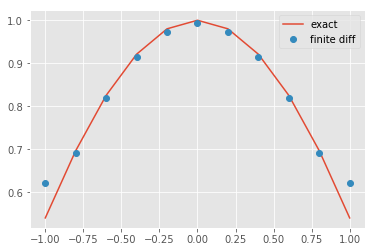

In [163]:
n = 10
x = np.linspace(-1,1,n+1)
du = np.cos(x)
op = diff_mat(n)
Du = np.dot(op, np.sin(x))
plt.plot(x, du, label='exact')
plt.plot(x, Du,'o', label='finite diff')
plt.legend(loc='upper right')
plt.show()

Now we'll compute the error based on the grid size.

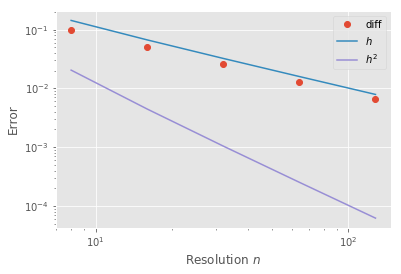

In [164]:
grid_error(diff_mat, np.sin, np.cos)

Let's compare this plot with a plot not including the boundaries

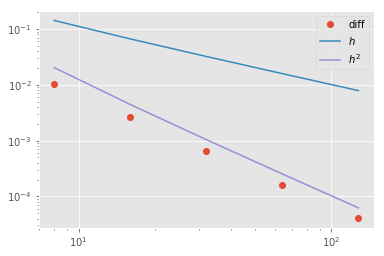

In [165]:
ns = 2**np.arange(3,8)
error = []
for n in ns:
    x = np.linspace(-1,1,n+1)
    du = np.cos(x)[1:-1]
    Du = np.dot(diff_mat(n), np.sin(x))[1:-1]
    error.append(np.linalg.norm(Du - du,np.inf))
plt.loglog(ns, error, 'o', label='diff')
plt.loglog(ns, (ns-1)**(-1.), label='$h$')
plt.loglog(ns, (ns-1)**(-2.), label='$h^2$')
plt.legend(loc='upper right')
plt.show()

We can clearly see that the boundaries make the estimation 1st order accurate - $h$. 

To better estimate the right boundary condition, use taylor expansions of $u(x)$, $u(x-h)$, and $u(x-2h)$ and the method of undetermined coefficients.

$$ D_2u(x) = au(x) + bu(x-h) + cu(x-2h) $$

Where, $ u(x-h) = u(x) -hu'(x) + \frac{1}{2}h^2u''(x) + ...$ and $ u(x-2h) = u(x) -2hu'(x) + 2h^2u''(x) + ...$

Solving for a, b, and c give $$ a = \frac{3}{2h}, b = \frac{-2}{h}, \text{ and}, c = \frac{1}{2h} $$

Therefore giving a stencil of $$ h^{-1}\begin{bmatrix} .5 & -2 & 1.5 \end{bmatrix} $$

Following a similar argument for the left boundary, the stencil is $$ h^{-1}\begin{bmatrix} -.5 & 2 & -1.5 \end{bmatrix} $$

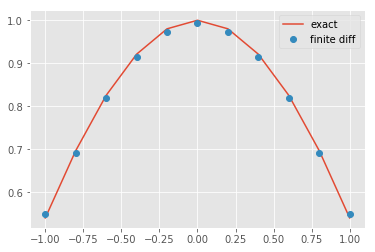

In [166]:
def diff_mat2(n):
    x = np.linspace(-1,1,n)
    h = 2 / n
    e = np.ones(n)
    L = (0 * np.eye(n+1) + .5*np.diag(e, 1) -.5* np.diag(e, -1)) / (h)
    L[0,:] = (-3*np.eye(n+1)[0,:] + 4*np.diag(e,1)[0,:] - np.diag(np.ones(n-1),2)[0,:])/ (2*h)
    L[-1,:] = (3*np.eye(n+1)[-1,:] -4*np.diag(e, -1)[-1,:] + np.diag(np.ones(n-1), -2)[-1,:])/(2*h)
    return L
n = 10
x = np.linspace(-1,1,n+1)
du = np.cos(x)
op = diff_mat2(n)
Du = np.matmul(op, np.sin(x))
plt.plot(x, du, label='exact')
plt.plot(x, Du,'o', label='finite diff')
plt.legend(loc='upper right')
plt.show()

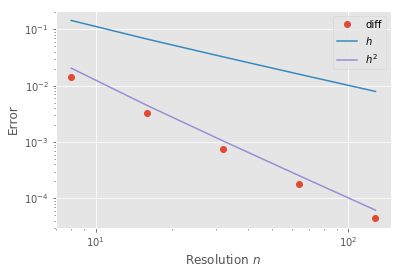

In [167]:
grid_error(diff_mat2, np.sin, np.cos)

Now the error is 2nd order accurate for all points on the grid!

#### Finite Difference for 2nd Derivative

To solve for the 2nd derivative, we'll use a combination of the left and right difference methods for first derivatives. 

[[-50.  25.   0.   0.   0.   0.   0.   0.   0.   0.   0.]
 [ 25. -50.  25.   0.   0.   0.   0.   0.   0.   0.   0.]
 [  0.  25. -50.  25.   0.   0.   0.   0.   0.   0.   0.]
 [  0.   0.  25. -50.  25.   0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.  25. -50.  25.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.  25. -50.  25.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.  25. -50.  25.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.  25. -50.  25.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   0.  25. -50.  25.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   0.  25. -50.  25.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0.  25. -50.]]


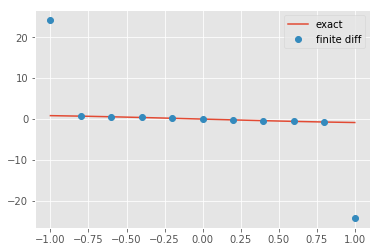

In [160]:
def diff2mat(n):
    x = np.linspace(-1,1,n+1)
    h = 2/n
    e = np.ones(n)
    L = (1*np.diag(e, -1) - 2*np.eye(n+1) + np.diag(e,1)) / h**2
    return L
n = 10
x = np.linspace(-1,1,n+1)
d2u = -np.sin(x)
op = diff2mat(n)
print(op)
D2u = np.matmul(op, np.sin(x))
plt.plot(x, d2u, label='exact')
plt.plot(x, D2u,'o', label='finite diff')
plt.legend(loc='upper right')
plt.show()

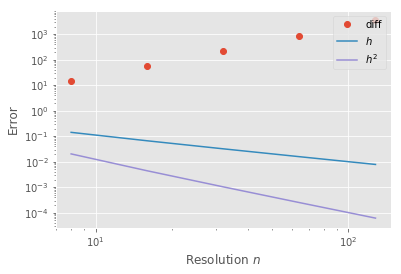

In [171]:
grid_error(diff2mat, np.sin, lambda l: -np.sin(l))